<a href="https://colab.research.google.com/github/Suchit070504/Calculator/blob/master/Pest_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rtlmhjbn/ip02-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/ip02-dataset


In [ ]:
import shutil

# Define paths
source_path = "/kaggle/input/ip02-dataset"
destination_path = "/content/drive/MyDrive/Minor project"

# Copy dataset to Google Drive
shutil.copytree(source_path, destination_path, dirs_exist_ok=True)

print(f"✅ Dataset successfully moved to: {destination_path}")


KeyboardInterrupt: 

In [ ]:
import torch
import torchvision.transforms as transforms
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

# Load categories from dataset
DATASET_PATH = "/kaggle/input/ip02-dataset/classification/train"  # Adjust path if needed
categories = sorted(os.listdir(DATASET_PATH))
print(f"✅ Found {len(categories)} categories: {categories}")

# Image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Custom Dataset class
class PestDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = []
        self.labels = []

        for label, category in enumerate(sorted(os.listdir(root_dir))):
            category_path = os.path.join(root_dir, category)
            if os.path.isdir(category_path):
                for img_name in os.listdir(category_path):
                    img_path = os.path.join(category_path, img_name)
                    self.image_paths.append(img_path)
                    self.labels.append(label)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        label = self.labels[idx]
        image = Image.open(img_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, label

# Load datasets
train_dataset = PestDataset(DATASET_PATH, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4, pin_memory=True)

# Load the model
model = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.IMAGENET1K_V1)
num_classes = len(categories)
num_features = model.classifier[1].in_features
model.classifier[1] = nn.Linear(num_features, num_classes)

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Loss function & optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=5e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

# Train the model
def train_model(model, train_loader, criterion, optimizer, scheduler, epochs=10):
    loss_history = []
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct, total = 0, 0

        for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}"):
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            correct += predicted.eq(labels).sum().item()
            total += labels.size(0)

        train_acc = 100 * correct / total
        scheduler.step()
        avg_loss = running_loss / len(train_loader)
        loss_history.append(avg_loss)
        print(f"Epoch {epoch+1}/{epochs} | Loss: {avg_loss:.4f} | Train Acc: {train_acc:.2f}%")

    plt.figure(figsize=(8, 6))
    plt.plot(range(1, epochs+1), loss_history, marker='o', linestyle='-', color='b', label='Training Loss')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Loss Curve")
    plt.legend()
    plt.show()

MODEL_PATH = "/content/drive/MyDrive/Minor project/Model/pest_classifier.pth"

# Check if a trained model already exists
if os.path.exists(MODEL_PATH):
    print("✅ Loading pre-trained model...")
    model.load_state_dict(torch.load(MODEL_PATH, map_location=device))
    model.to(device)
else:
    print("🚀 Training new model...")
    train_model(model, train_loader, criterion, optimizer, scheduler, epochs=10)
    torch.save(model.state_dict(), MODEL_PATH)
    print("✅ Model training complete and saved!")


✅ Found 102 categories: ['0', '1', '10', '100', '101', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']


Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 130MB/s] 


🚀 Training new model...


Epoch 1/10:   0%|          | 0/705 [00:00<?, ?it/s]

📷 Enter the path of the image: /content/drive/MyDrive/Minor project/Model/43676.jpg


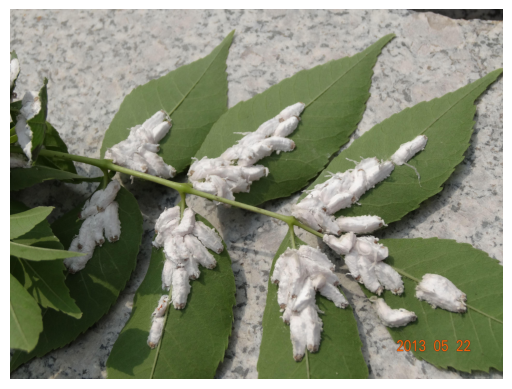


📸 Image: /content/drive/MyDrive/Minor project/Model/43676.jpg
   1. 64 Polyphagotars onemus latus (Confidence: 99.90%)
      Recommended Pesticide: Cartap Hydrochloride 4% GR (8 kg/acre)
   2. 77  Icerya purchasi Maskell (Confidence: 0.07%)
      Recommended Pesticide: Lambda-cyhalothrin 5% EC (200 ml/acre)
   3. 58 Apolygus lucorum (Confidence: 0.01%)
      Recommended Pesticide: Buprofezin 25% SC (400 ml/acre)
   4. 83  Aleurocanthus spiniferus (Confidence: 0.01%)
      Recommended Pesticide: Buprofezin 25% SC (400 ml/acre)
   5. 60 Viteus vitifoliae (Confidence: 0.00%)
      Recommended Pesticide: Pymetrozine 50% WG (120 gm/acre)


In [ ]:
import torch
import torchvision.transforms as transforms
import torchvision.models as models
import torch.nn as nn
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd

# Load pest and pesticide data from CSV
def load_pest_data(csv_path):
    """Load pest classification data from CSV into a dictionary."""
    df = pd.read_csv(csv_path)
    return {
        row["Pest Class ID"]: {
            "name": row["Pest Name"],
            "pesticide": row["Recommended Pesticide"],
            "amount": row["Amount"]
        }
        for _, row in df.iterrows()
    }

# Define image transformations
def get_transform():
    """Return transformation pipeline for image preprocessing."""
    return transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ])

# Load trained model
def load_model(model_path, num_classes):
    """Load the trained EfficientNet-B0 model with the correct classification layer."""
    model = models.efficientnet_b0()
    num_features = model.classifier[1].in_features
    model.classifier[1] = nn.Linear(num_features, num_classes)
    model.load_state_dict(torch.load(model_path, map_location=torch.device("cpu")))
    model.eval()  # Set to evaluation mode
    return model

# Predict pest category for an image
def predict_image(model, image_path, pest_data, transform):
    """Predict the pest category and pesticide recommendation for an image."""
    try:
        image = Image.open(image_path).convert("RGB")
        image = transform(image).unsqueeze(0)  # Add batch dimension

        with torch.no_grad():
            outputs = model(image)
            probabilities = torch.nn.functional.softmax(outputs[0], dim=0)
            top5_probs, top5_classes = torch.topk(probabilities, 5)

        predictions = []
        for class_idx, prob in zip(top5_classes, top5_probs):
            class_idx = class_idx.item()
            pest_info = pest_data.get(class_idx, {"name": "Unknown", "pesticide": "N/A", "amount": "N/A"})
            predictions.append({
                "pest": pest_info["name"],
                "confidence": f"{prob.item():.2%}",
                "pesticide": pest_info["pesticide"],
                "amount": pest_info["amount"]
            })

        return predictions
    except Exception as e:
        return f"❌ Error processing image {image_path}: {e}"

# Display image
def display_image(image_path):
    """Display the provided image."""
    try:
        image = Image.open(image_path)
        plt.imshow(image)
        plt.axis("off")
        plt.show()
    except Exception as e:
        print(f"❌ Error displaying image {image_path}: {e}")

# Main execution
if __name__ == "__main__":
    CSV_PATH = "/content/drive/MyDrive/Minor project/Model/full_pesticide_recommendation.csv"
    MODEL_PATH = "/content/drive/MyDrive/Minor project/Model/pest_classifier.pth"

    IMAGE_PATH = input("📷 Enter the path of the image: ")  # Ask for image path input

    pest_data = load_pest_data(CSV_PATH)
    transform = get_transform()
    model = load_model(MODEL_PATH, num_classes=len(pest_data))

    display_image(IMAGE_PATH)  # Show the image before predictions

    predictions = predict_image(model, IMAGE_PATH, pest_data, transform)

    print(f"\n📸 Image: {IMAGE_PATH}")
    if isinstance(predictions, str):
        print(predictions)
    else:
        for rank, result in enumerate(predictions, 1):
            print(f"   {rank}. {result['pest']} (Confidence: {result['confidence']})")
            print(f"      Recommended Pesticide: {result['pesticide']} ({result['amount']})")


📷 Enter the path of the image: /content/drive/MyDrive/Minor project/Model/64688.jpg


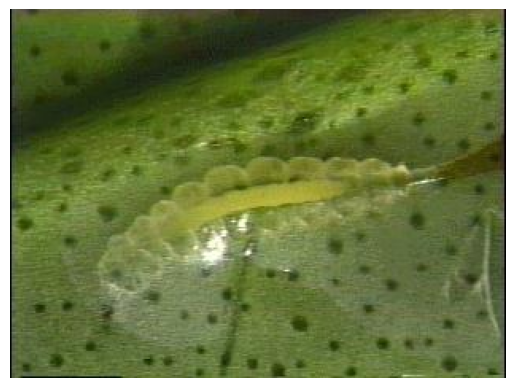


📸 Image: /content/drive/MyDrive/Minor project/Model/64688.jpg
   1. 90  Toxoptera citricidus (Confidence: 40.98%)
      Recommended Pesticide: Chlorpyrifos 20% EC (1000 ml/acre)
   2. 95  Lawana imitata Melichar (Confidence: 37.40%)
      Recommended Pesticide: Acephate 75% SP (600 gm/acre)
   3. 53 therioaphis maculata Buckton (Confidence: 19.56%)
      Recommended Pesticide: Cartap Hydrochloride 4% GR (10 kg/acre)
   4. 35 wheat sawfly (Confidence: 0.54%)
      Recommended Pesticide: Pymetrozine 50% WG (120 gm/acre)
   5. 43 beet weevil (Confidence: 0.47%)
      Recommended Pesticide: Lambda-cyhalothrin 5% EC (150 ml/acre)


In [ ]:
# Main execution
if __name__ == "__main__":
    CSV_PATH = "/content/drive/MyDrive/Minor project/Model/full_pesticide_recommendation.csv"
    MODEL_PATH = "/content/drive/MyDrive/Minor project/Model/pest_classifier.pth"

    IMAGE_PATH = input("📷 Enter the path of the image: ")  # Ask for image path input

    pest_data = load_pest_data(CSV_PATH)
    transform = get_transform()
    model = load_model(MODEL_PATH, num_classes=len(pest_data))

    display_image(IMAGE_PATH)  # Show the image before predictions

    predictions = predict_image(model, IMAGE_PATH, pest_data, transform)

    print(f"\n📸 Image: {IMAGE_PATH}")
    if isinstance(predictions, str):
        print(predictions)
    else:
        for rank, result in enumerate(predictions, 1):
            print(f"   {rank}. {result['pest']} (Confidence: {result['confidence']})")
            print(f"      Recommended Pesticide: {result['pesticide']} ({result['amount']})")